# Identification of corn leaf Diseases Using a deep convolutional neural network architecture by transfer learning


![alt text](https://static.country-guide.ca/wp-content/uploads/2016/04/March-III-2016-Headin_opt.jpeg)


## **Problem Statement**

The plant diseases compose a threat to global food security and smallholder farmers whose livelihoods depend mainly on agriculture and healthy crops. In developing countries, smallholder farmers produce more than 80% of the agricultural production, and reports indicate that more than fifty percent loss in crop due to pests and diseases. The world population expected to grow to more than 9.7 billion by 2050, making food security a major concern in the upcoming years. Hence, rapid and accurate methods of indentying plant diseases are needed to do the appropiate measures.

In this project, we built a Convolutional Neural Network model by transfer learning and fine-tuning to detect diseases in the corn leaves through digital images.




## **Plant Village Dataset**

- The plant-Village dataset contains 39 different classes of plant leaf(healthy and unhealthy) and background images(61,486 in total)(Geetharamani & Pandian,2019). In this project,  we use the version without augmentation and just used the corn dataset, which contained four different classes (Blight, Common rust, Gray Leaf Spot, and Healthy).

In [1]:
## Import libraries
import warnings
warnings.simplefilter(action='ignore')
import os 
import zipfile
from shutil import copyfile
import random

import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay


import tensorflow as tf
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## **Load the Dataset**

- Load and extract the dataset 
- Create train and test files 
- Split and assign the data into train, validation and test folders(80:10:10)
- Display some images

In [ ]:
## Conection with Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Load and extract the dataset
input_path = "/content/drive/MyDrive/Plant_Village_Dataset_Corn/Corn_Leaf_Disease.zip"

local_zip = input_path
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/Plant_Village_Dataset_Corn')
zip_ref.close()

In [5]:
extrac_path = 'D:/varnis project/data sets/corn dataset'

for set_ in ['corn dataset']:
    n_blight = len(os.listdir(extrac_path + '/Blight'))
    n_common_rust = len(os.listdir(extrac_path + '/Common_Rust'))
    n_gray_leaf_spot = len(os.listdir(extrac_path + '/Gray_Leaf_Spot'))
    n_health = len(os.listdir(extrac_path + '/Healthy'))
    print('blight images: {}, common rust images: {}, gray leaf spot images: {}, healt images:{}'.format(n_blight,
                                                                                                         n_common_rust,
                                                                                                         n_gray_leaf_spot,
                                                                                                         n_health))

blight images: 1146, common rust images: 1306, gray leaf spot images: 574, healt images:1162


In [19]:
##Create train and test files
try:
    os.mkdir('D:/varnis project/data sets/Split_data')
    os.mkdir('D:/varnis project/data sets/Split_data/train')
    os.mkdir('D:/varnis project/data sets/Split_data/train/Blight')
    os.mkdir('D:/varnis project/data sets/Split_data/train/Common_Rust')
    os.mkdir('D:/varnis project/data sets/Split_data/train/Gray_Leaf_Spot')
    os.mkdir('D:/varnis project/data sets/Split_data/train/Healthy')

    os.mkdir('D:/varnis project/data sets/Split_data/val')
    os.mkdir('D:/varnis project/data sets/Split_data/val/Blight')
    os.mkdir('D:/varnis project/data sets/Split_data/val/Common_Rust')
    os.mkdir('D:/varnis project/data sets/Split_data/val/Gray_Leaf_Spot')
    os.mkdir('D:/varnis project/data sets/Split_data/val/Healthy')

    os.mkdir('D:/varnis project/data sets/Split_data/test')
    os.mkdir('D:/varnis project/data sets/Split_data/test/Blight')
    os.mkdir('D:/varnis project/data sets/Split_data/test/Common_Rust')
    os.mkdir('D:/varnis project/data sets/Split_data/test/Gray_Leaf_Spot')
    os.mkdir('D:/varnis project/data sets/Split_data/test/Healthy')
except OSError:
    print(file)

NameError: name 'file' is not defined

#### **Split and assign the data into train, validation and test folders(80:10:10)**

In [20]:
#Split and assign the data into train and test files(80:20)
def split_data(SOURCE, TRAINING, VALIDATION, TESTING):
    
    all_files = []
    
    for file_name in os.listdir(SOURCE):
        file_path = SOURCE + file_name
        
        if os.path.getsize(file_path):
            all_files.append(file_name)
        else:
            print('{} is zero length, so ignoring'.format(file_name))
    
    n_files = len(all_files)
    split_point_1 = round(n_files * 0.8)
    split_point_2 = round(n_files * 0.9)

    shuffled = random.sample(all_files, n_files)
    
    train_set = shuffled[:split_point_1]
    val_set = shuffled[split_point_1:split_point_2]
    test_set = shuffled[split_point_2:]
    
    for file_name in train_set:
        copyfile(SOURCE + file_name, TRAINING + file_name)
    
    for file_name in val_set:
        copyfile(SOURCE + file_name, VALIDATION + file_name)
        
    for file_name in test_set:
        copyfile(SOURCE + file_name, TESTING + file_name)

Blight_SOURCE_DIR = 'D:/varnis project/data sets/corn dataset/Blight/'
Common_Rust_SOURCE_DIR = 'D:/varnis project/data sets/corn dataset/Common_Rust/'
Gray_Leaf_Spot_SOURCE_DIR = 'D:/varnis project/data sets/corn dataset/Gray_Leaf_Spot/'
Healthy_SOURCE_DIR = 'D:/varnis project/data sets/corn dataset/Healthy/'

TRAINING_Blight_DIR = 'D:/varnis project/data sets/Split_data/train/Blight'
TRAINING_Common_Rust_DIR ='D:/varnis project/data sets/Split_data/train/Common_Rust/'
TRAINING_Gray_Leaf_Spot_DIR ='D:/varnis project/data sets/Split_data/train/Gray_Leaf_Spot/'
TRAINING_Healthy_DIR ='D:/varnis project/data sets/Split_data/train/Healthy/'

VALIDATION_Blight_DIR = 'D:/varnis project/data sets/Split_data/val/Blight/'
VALIDATION_Common_Rust_DIR ='D:/varnis project/data sets/Split_data/val/Common_Rust/'
VALIDATION_Gray_Leaf_Spot_DIR ='D:/varnis project/data sets/Split_data/val/Gray_Leaf_Spot/'
VALIDATION_Healthy_DIR ='D:/varnis project/data sets/Split_data/val/Healthy/'

TESTING_Blight_DIR = 'D:/varnis project/data sets/Split_data/test/Blight/'
TESTING_Common_Rust_DIR ='D:/varnis project/data sets/Split_data/test/Common_Rust/'
TESTING_Gray_Leaf_Spot_DIR ='D:/varnis project/data sets/Split_data/test/Gray_Leaf_Spot/'
TESTING_Healthy_DIR ='D:/varnis project/data sets/Split_data/test/Healthy/'


split_data(Blight_SOURCE_DIR, TRAINING_Blight_DIR, VALIDATION_Blight_DIR, TESTING_Blight_DIR)
split_data(Common_Rust_SOURCE_DIR, TRAINING_Common_Rust_DIR, VALIDATION_Common_Rust_DIR, TESTING_Common_Rust_DIR)
split_data(Gray_Leaf_Spot_SOURCE_DIR,TRAINING_Gray_Leaf_Spot_DIR, VALIDATION_Gray_Leaf_Spot_DIR, TESTING_Gray_Leaf_Spot_DIR)
split_data(Healthy_SOURCE_DIR,TRAINING_Healthy_DIR, VALIDATION_Healthy_DIR, TESTING_Healthy_DIR)

#### **Diplay some images**

[(0, 'train'), (1, 'val'), (2, 'test')]
['Corn_Blight (1).jpeg', 'Corn_Blight (100).jpg', 'Corn_Blight (1002).JPG', 'Corn_Blight (1004).JPG', 'Corn_Blight (1005).JPG', 'Corn_Blight (1006).JPG', 'Corn_Blight (1014).JPG', 'Corn_Blight (1019).JPG', 'Corn_Blight (1020).JPG', 'Corn_Blight (1021).JPG', 'Corn_Blight (1025).JPG', 'Corn_Blight (1026).JPG', 'Corn_Blight (1032).JPG', 'Corn_Blight (1038).jpg', 'Corn_Blight (1039).jpg', 'Corn_Blight (1041).JPG', 'Corn_Blight (1057).JPG', 'Corn_Blight (1067).JPG', 'Corn_Blight (1069).JPG', 'Corn_Blight (1076).jpg', 'Corn_Blight (108).jpg', 'Corn_Blight (1108).jpg', 'Corn_Blight (111).JPG', 'Corn_Blight (1120).jpg', 'Corn_Blight (1139).jpg', 'Corn_Blight (123).JPG', 'Corn_Blight (127).JPG', 'Corn_Blight (130).jpg', 'Corn_Blight (131).JPG', 'Corn_Blight (133).JPG', 'Corn_Blight (136).JPG', 'Corn_Blight (138).JPG', 'Corn_Blight (15).jpg', 'Corn_Blight (154).JPG', 'Corn_Blight (158).JPG', 'Corn_Blight (165).jpg', 'Corn_Blight (166).JPG', 'Corn_Blight (1

IndexError: list index out of range

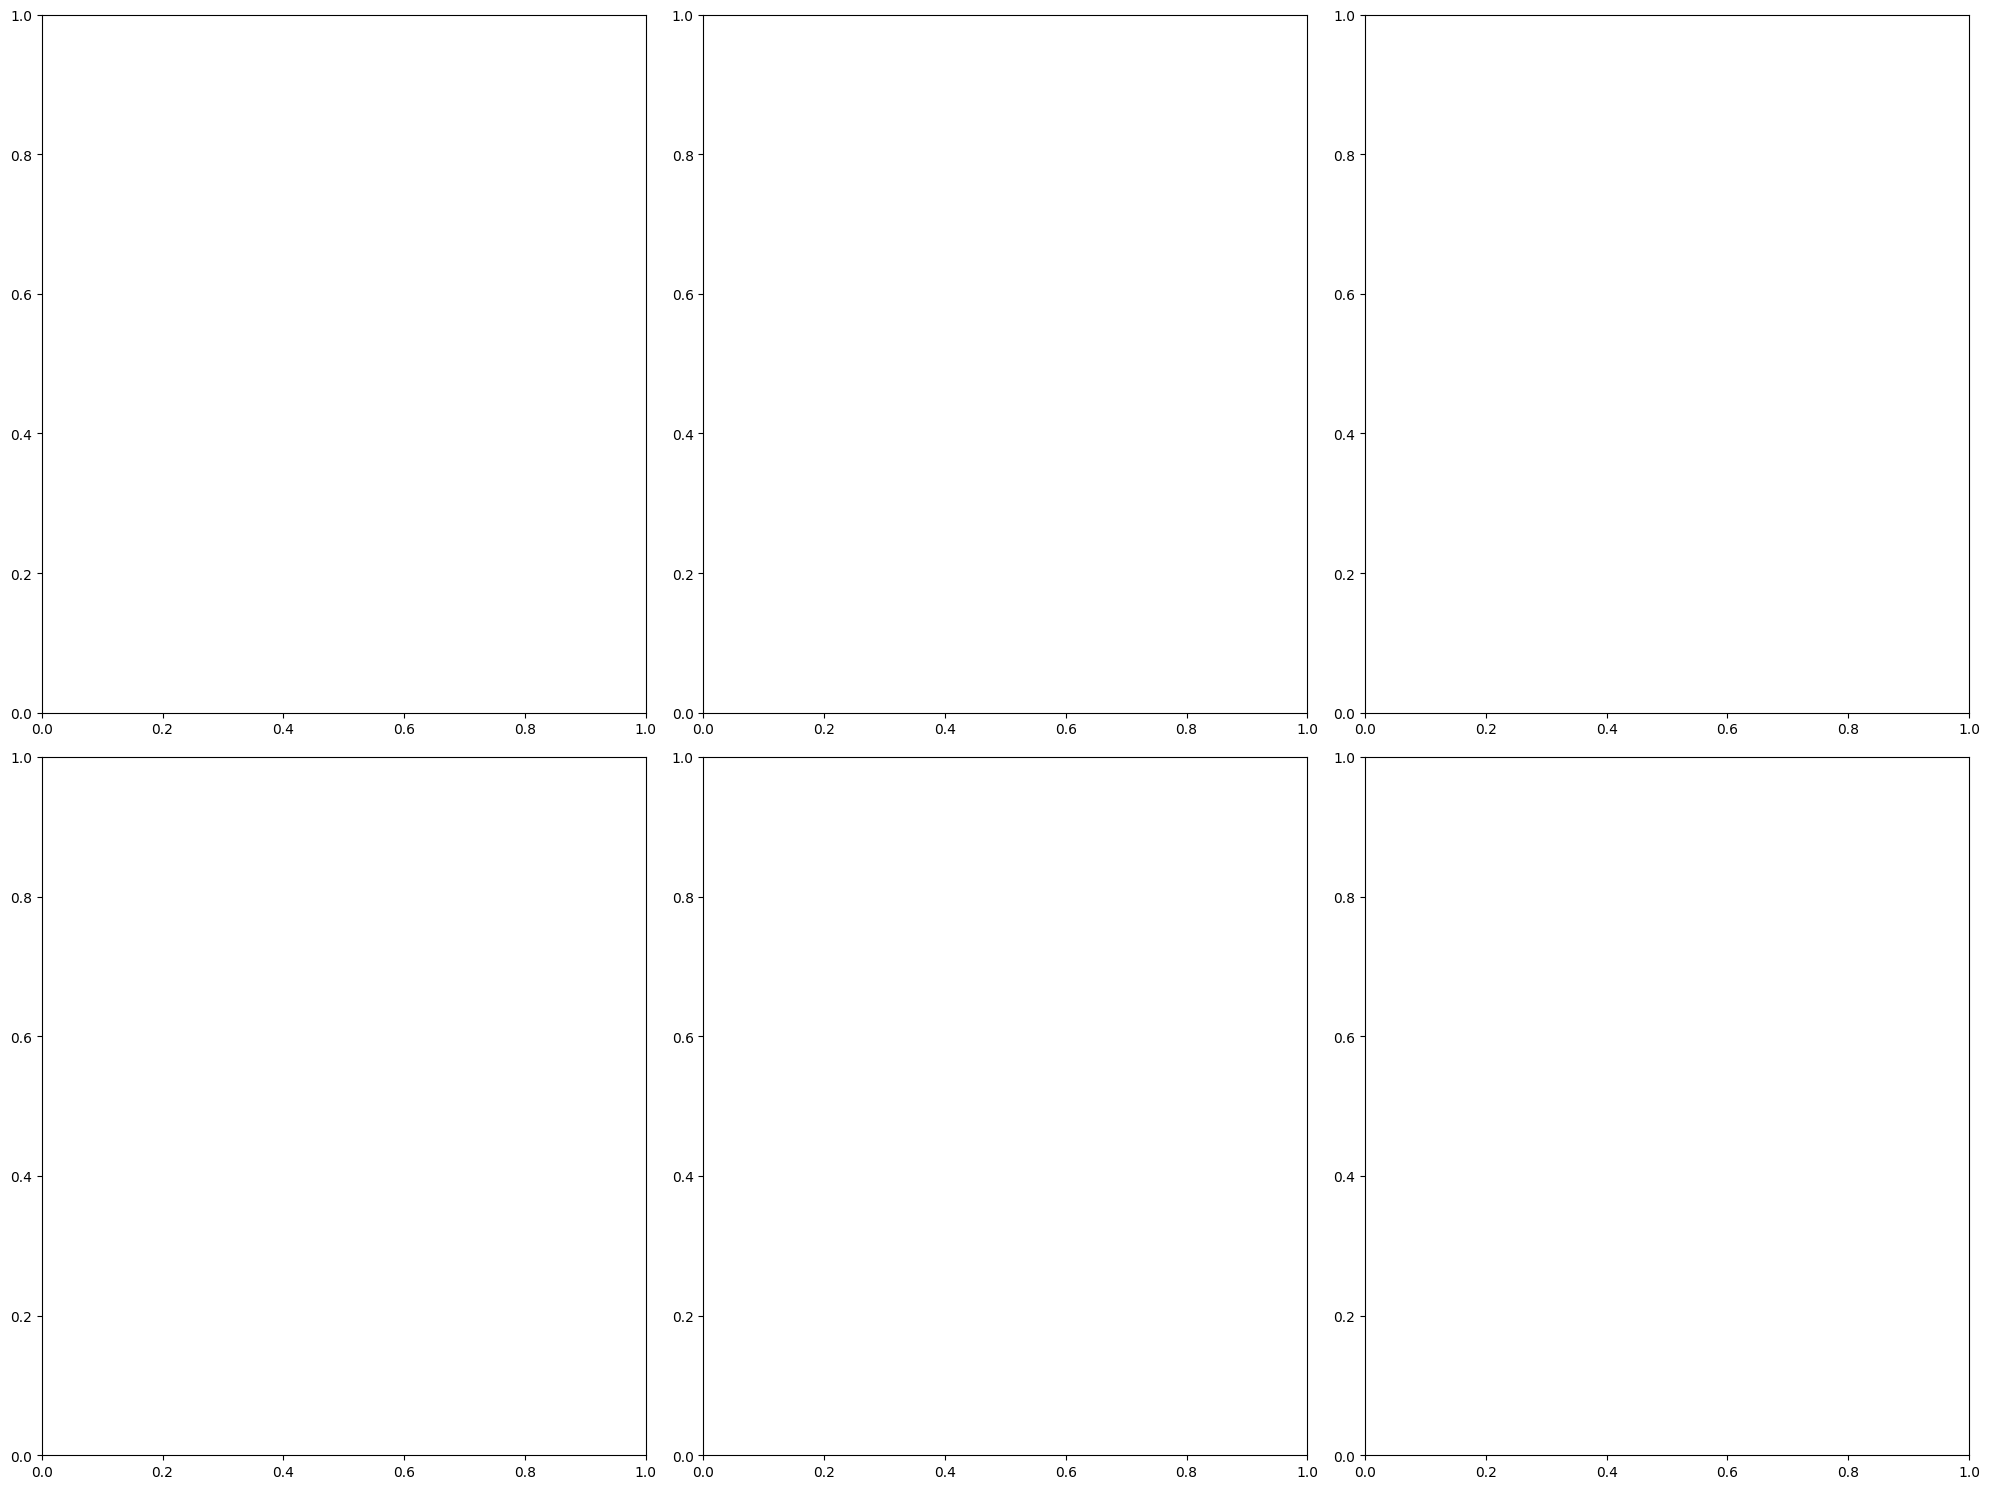

In [21]:
##
path_ = 'D:/varnis project/data sets/Split_data/'

fig, ax = plt.subplots(2,3,figsize=(20,15))
ax = ax.ravel()
plt.tight_layout()
print(list(enumerate(['train','val', 'test'])))
for i, set_ in enumerate(['train','val', 'test']):
    set_path = path_+ set_
    print(os.listdir('D:/varnis project/data sets/Split_data/test/Blight'))
    ax[i].imshow(plt.imread('D:/varnis project/data sets/Split_data/test/Blight'))
    ax[i].set_title('Set: {}, Condition: Blight'.format(set_))
    ax[i+3].imshow(plt.imread(set_path+'/Common_Rust/'+os.listdir(set_path+'/Common_Rust')[0]))
    ax[i+3].set_title('Set: {}, Condition: Common_Rust'.format(set_))

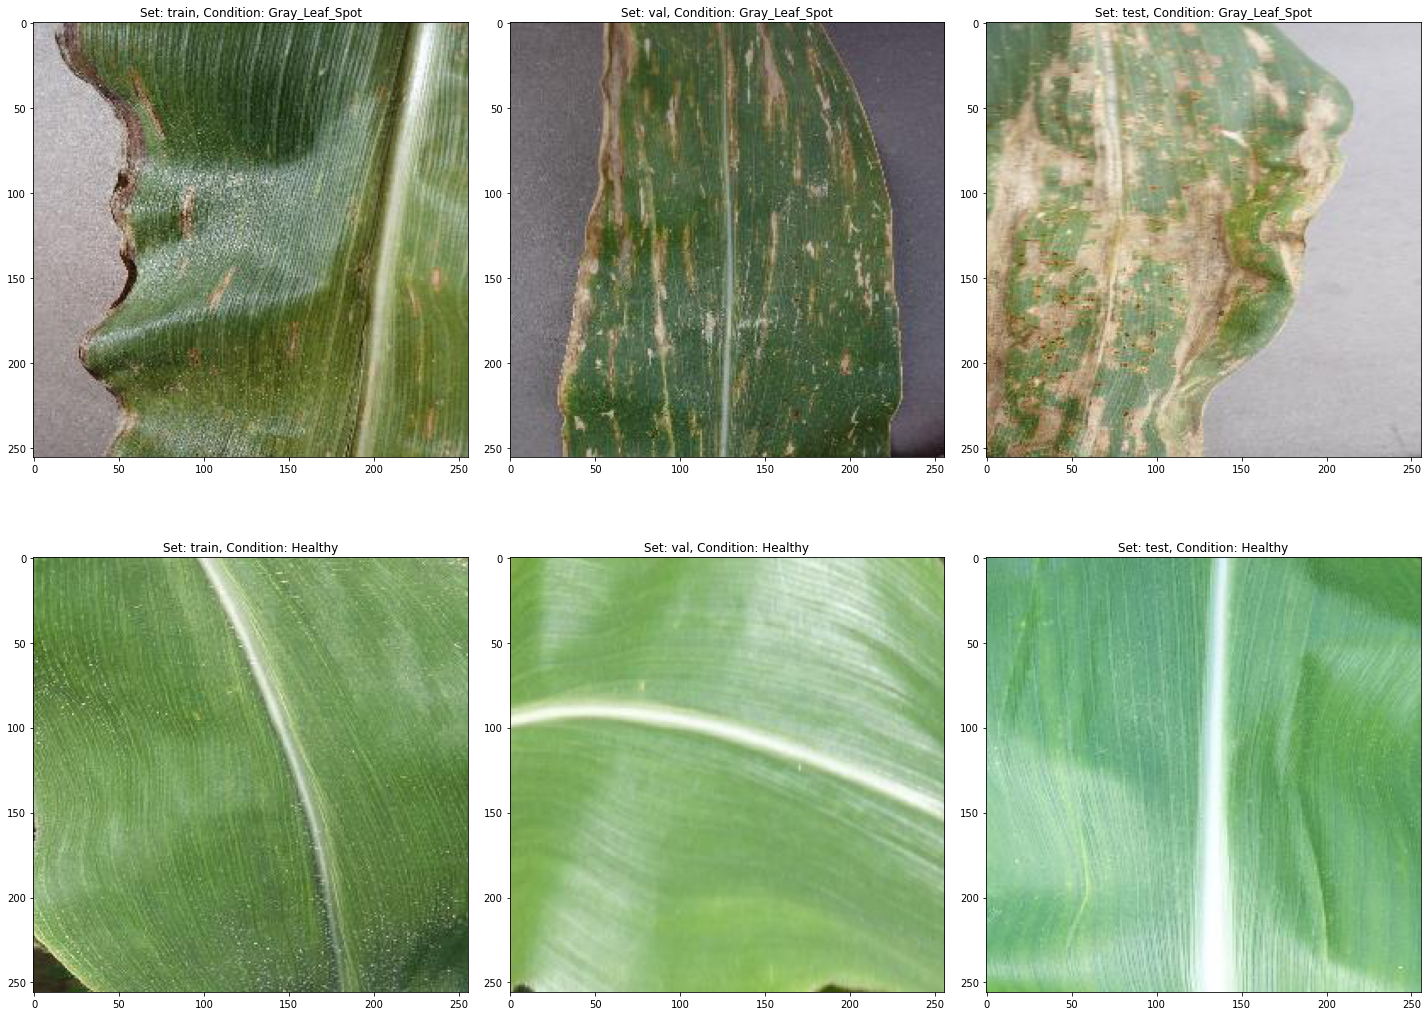

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(20,15))
ax = ax.ravel()
plt.tight_layout()

for i, set_ in enumerate(['train','val','test']):
    set_path = path_+ set_
    ax[i].imshow(plt.imread(set_path+'/Gray_Leaf_Spot/'+os.listdir(set_path+'/Gray_Leaf_Spot')[0]))
    ax[i].set_title('Set: {}, Condition: Gray_Leaf_Spot'.format(set_))
    ax[i+3].imshow(plt.imread(set_path+'/Healthy/'+os.listdir(set_path+'/Healthy')[0]))
    ax[i+3].set_title('Set: {}, Condition: Healthy'.format(set_))

## **Data preprocessing** 

- Split data into train and test set 
- Data normalization[0,1]
- Data augmentation using saveral techniques such as:
  - image flipping
  - zoom
  - shear 
  - width and height shift
  - image rotation
  - Image brightness range
  - Featurewise center
  - Featurewise std normalization
  
Note: the techniques of data augmentation were implemented using ImageDataGenerator from Keras. 

In [ ]:
def train_val_test_data(img_dims, batch_size):
  
  ## Training data
  train_datagen = ImageDataGenerator(rescale = 1./255,
                                       rotation_range = 40,
                                       width_shift_range = .2,
                                       height_shift_range = .2,
                                       shear_range = .2,
                                       zoom_range = 0.3,
                                       horizontal_flip = True,
                                       vertical_flip=True,
                                       brightness_range=[0.5, 1.5],
                                       featurewise_center=True,
                                       featurewise_std_normalization=True,
                                       fill_mode = 'nearest',
                                   )
        
    
  ## Train generator
  train_gen = train_datagen.flow_from_directory(directory = path_ + 'train',
                                                  target_size = (img_dims, img_dims),
                                                  batch_size = batch_size,
                                                  class_mode = 'categorical',
                                                  shuffle = True)
  ## Validation Data
    
  validation_datagen = ImageDataGenerator(rescale = 1./255)
  ## validation generator
    
  val_gen = validation_datagen.flow_from_directory(directory = path_ + 'val',
                                                      target_size = (img_dims, img_dims),
                                                      batch_size = batch_size,
                                                      class_mode = 'categorical',
                                                      shuffle = True)
  
  
    
  return train_gen, val_gen

In [ ]:
img_dims = 224
batch_size = 128

train_gen, val_gen = train_val_test_data(img_dims, batch_size)

Found 3351 images belonging to 4 classes.
Found 418 images belonging to 4 classes.


## **Modeling** 

- Transfer learning (MobileNetV2 architecture)
- Fine-tuning


### **Transfer learning**
- Import MobileNetV2 model pretrained with imaginet dataset
- Freezing all layers from MobileNetV2 model
- Built a model with new top layers to classify 4 classes instead of 1000
- Training:
  - Epochs = 50
  - Adam optimizer with a 0.0001 base learning rate
- Model performance

In [ ]:
## Choose a device type (CPU or GPU)
devices = tf.config.list_physical_devices('GPU')
print(devices[0])

## Name divice
name_gpu = "GPU:0"

## Define my strategy like One Device Strategy 
strategy = tf.distribute.OneDeviceStrategy(device=name_gpu)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


#### **CNN-MobileNetV2 model**

- MobileNetV2 is a convolutional neural network architecture that seeks to perform well on mobile devices. It is based on an inverted residual structure where the residual connections are between the bottleneck layers. The intermediate expansion layer uses lightweight depthwise convolutions to filter features as a source of non-linearity. As a whole, the architecture of MobileNetV2 contains the initial fully convolution layer with 32 filters, followed by 19 residual bottleneck layers.

![MobilenetV2 Model](https://production-media.paperswithcode.com/methods/Screen_Shot_2020-06-06_at_10.37.14_PM.png)

MobileNet architecture

In [ ]:
def mobilenetv2():
  
  mobilenet_m = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(img_dims,img_dims,3),
                                                               include_top = False,
                                                               weights = 'imagenet'
                                                               )
  x = mobilenet_m.trainable = False
  x = mobilenet_m.output

  x = GlobalAveragePooling2D()(x)
  out = Dense(4,activation='softmax')(x)
  
  model = Model(inputs = mobilenet_m.inputs, outputs = out)

  model.summary() 

  return model

In [ ]:
with strategy.scope():

  mobilenetv2_model = mobilenetv2()
  mobilenetv2_model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr = .0001),metrics = ['accuracy'])

9420800/9406464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                               

### **Train the MobileNetV2 model**

In [ ]:
epochs_1 = 50
history_1 = mobilenetv2_model.fit(train_gen, steps_per_epoch=train_gen.samples // batch_size,
                               epochs=epochs_1, validation_data=(val_gen), 
                               validation_steps=val_gen.samples // batch_size
                                    )

Epoch 1/50
26/26 [==============================] - 896s 34s/step - loss: 1.3245 - accuracy: 0.3855 - val_loss: 1.1872 - val_accuracy: 0.4870
Epoch 2/50
26/26 [==============================] - 57s 2s/step - loss: 1.0507 - accuracy: 0.5827 - val_loss: 0.9902 - val_accuracy: 0.6016
Epoch 3/50
26/26 [==============================] - 58s 2s/step - loss: 0.8788 - accuracy: 0.6876 - val_loss: 0.8575 - val_accuracy: 0.6901
Epoch 4/50
26/26 [==============================] - 58s 2s/step - loss: 0.7687 - accuracy: 0.7375 - val_loss: 0.7670 - val_accuracy: 0.7188
Epoch 5/50
26/26 [==============================] - 58s 2s/step - loss: 0.6945 - accuracy: 0.7735 - val_loss: 0.6901 - val_accuracy: 0.7604
Epoch 6/50
26/26 [==============================] - 57s 2s/step - loss: 0.6325 - accuracy: 0.7921 - val_loss: 0.6546 - val_accuracy: 0.7682
Epoch 7/50
26/26 [==============================] - 58s 2s/step - loss: 0.5845 - accuracy: 0.7971 - val_loss: 0.5995 - val_accuracy: 0.7891
Epoch 8/50
26/26 [

#### **MobileNetV2 model performance**
- loss and accuracy plot 
- Evaluation with the validation set
- Evaluation metrics:
 - Accuracy


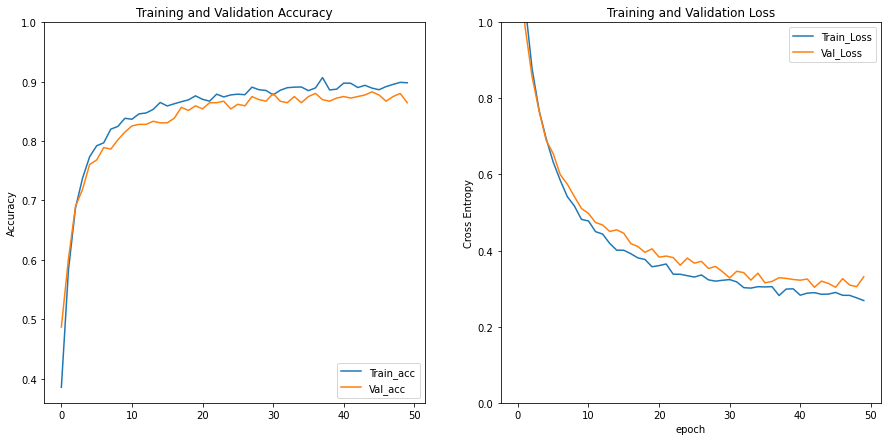

In [ ]:
### Loss and accuracy plot
acc_mob = history_1.history['accuracy']
val_acc_mob = history_1.history['val_accuracy']

loss_mob = history_1.history['loss']
val_loss_mob = history_1.history['val_loss']

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(acc_mob, label='Train_acc')
plt.plot(val_acc_mob, label='Val_acc')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss_mob, label='Train_Loss')
plt.plot(val_loss_mob, label='Val_Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
result_eval = mobilenetv2_model.evaluate(val_gen, verbose =0)

for metric, eval in zip(mobilenetv2_model.metrics_names, result_eval):
  print(metric + ': {:.3}'.format(eval))

loss: 0.317
accuracy: 0.873


### **Fine-tuning the model**
- Un-freeze the top layers of MobileNetV2 model
- training:
  - Total epochs = 75
  - Adam optimazer with a low learning rate (base_learning_rate/10) to avoid the overfitting 

In [ ]:
## Unfreezing layers
mobilenetv2_model.trainable = True

In [ ]:
## Fine-tuning
## number of layer in the pre-trained model
print('Number of layer in the pre-trained model:{}'.format(len(mobilenetv2_model.layers)))
fine_tune_at = 100

for layer in mobilenetv2_model.layers[:fine_tune_at]:
  layer.trainable = False
print(f"Trainable Layers: {len(mobilenetv2_model.trainable_variables)}")

Number of layer in the pre-trained model:156
Trainable Layers: 56


In [ ]:
with strategy.scope():
  
  mobilenetv2_model.summary()
  mobilenetv2_model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr = 0.0001/10),metrics = ['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
## Training
fine_tune_epochs = 25
total_epochs = epochs_1 + fine_tune_epochs

history_fine = mobilenetv2_model.fit(train_gen, steps_per_epoch=train_gen.samples // batch_size,
                                            epochs=total_epochs,
                                            initial_epoch = history_1.epoch[-1], 
                                            validation_data=(val_gen), 
                                            validation_steps=val_gen.samples // batch_size,
                                    )

Epoch 50/75
26/26 [==============================] - 60s 2s/step - loss: 0.1907 - accuracy: 0.9327 - val_loss: 0.3679 - val_accuracy: 0.8698
Epoch 51/75
26/26 [==============================] - 61s 2s/step - loss: 0.1959 - accuracy: 0.9209 - val_loss: 0.3304 - val_accuracy: 0.8776
Epoch 52/75
26/26 [==============================] - 60s 2s/step - loss: 0.1969 - accuracy: 0.9255 - val_loss: 0.3335 - val_accuracy: 0.8750
Epoch 53/75
26/26 [==============================] - 59s 2s/step - loss: 0.1963 - accuracy: 0.9221 - val_loss: 0.3174 - val_accuracy: 0.8854
Epoch 54/75
26/26 [==============================] - 57s 2s/step - loss: 0.1845 - accuracy: 0.9286 - val_loss: 0.3135 - val_accuracy: 0.8854
Epoch 55/75
26/26 [==============================] - 59s 2s/step - loss: 0.1763 - accuracy: 0.9299 - val_loss: 0.2979 - val_accuracy: 0.8958
Epoch 56/75
26/26 [==============================] - 58s 2s/step - loss: 0.1792 - accuracy: 0.9333 - val_loss: 0.2915 - val_accuracy: 0.8906
Epoch 57/75
2

#### **Fine-tuning model performance**
- loss and accuracy plot
- Evaluate with the validation set
- Metrics:
 - Accuracy
 

In [ ]:
acc_mob += history_fine.history['accuracy']
val_acc_mob += history_fine.history['val_accuracy']

loss_mob += history_fine.history['loss']
val_loss_mob += history_fine.history['val_loss']


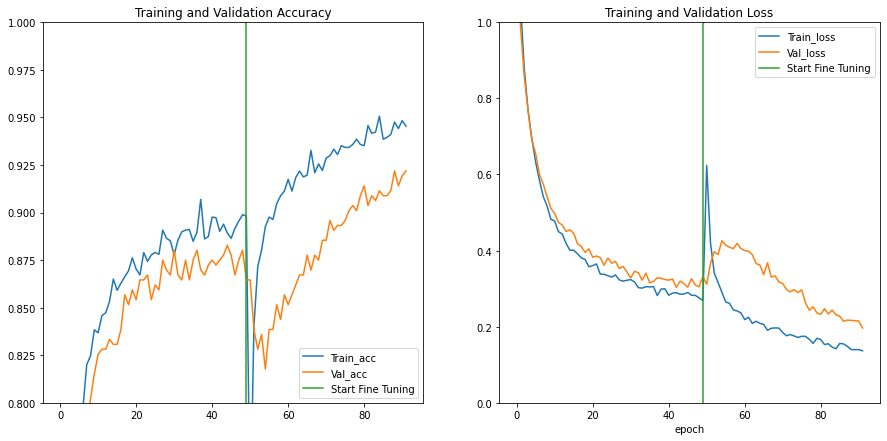

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(acc_mob, label='Train_acc')
plt.plot(val_acc_mob, label='Val_acc')
plt.ylim([0.8, 1])
plt.plot([epochs_1-1,epochs_1-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss_mob, label='Train_loss')
plt.plot(val_loss_mob, label='Val_loss')
plt.ylim([0, 1.0])
plt.plot([epochs_1-1,epochs_1-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
result_eval_f = mobilenetv2_model.evaluate(val_gen, verbose =0)

#for metric_, eval_ in zip(mobilenetv2_model.metrics_names, result_eval_f):
#  print(metric_ + ': {:.3}'.format(eval_))

loss: 0.21
accuracy: 0.916


##### **Observations**

- The initial model with the transfer learning technique reaches a good performance(accuracy = 0.87).

- Unfreezing some layers (fine-tuning) give more performance to the model, reaching an accuracy = 0.92 and loss = 0.21 with the validation set

### **Model Evaluation with the test set**

In [ ]:
## Import the test set
input_test = '/content/drive/MyDrive/Plant_Village_Dataset_Corn/Leaf_Disease/test'
labels = os.listdir(input_test)
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_dims, img_dims)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
test_set_ = get_data(input_test)

## X and y test
X_test, y_test = [],[]
for feature, labels in test_set_:
  X_test.append(feature)
  y_test.append(labels)
## Convert the data in arrays 
X_test = np.array(X_test) / 255
y_test = np.array(y_test)

In [ ]:
## Prediction 
y_pred = np.argmax(mobilenetv2_model.predict(X_test), axis = -1)

Accuracy: 0.943%


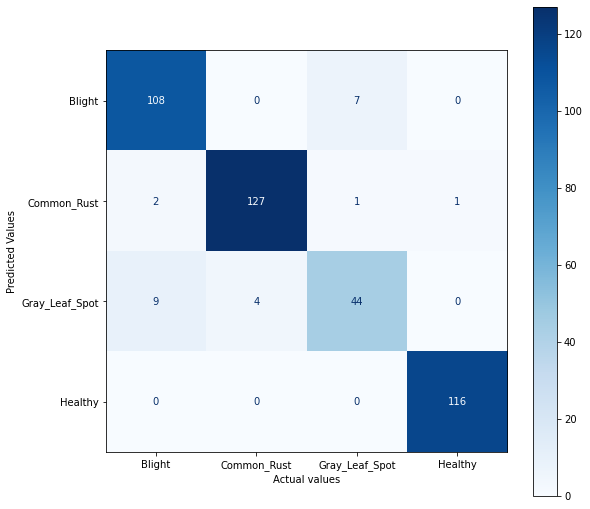

In [ ]:
from sklearn.metrics import accuracy_score

#print("CONFUSION MATRIX ------------------------------")
fig, ax = plt.subplots(figsize=(9,9))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'Blues', ax = ax)
ax.set_xlabel("Actual values")
ax.set_ylabel("Predicted Values")
ax.xaxis.set_ticklabels(["Blight", "Common_Rust","Gray_Leaf_Spot", "Healthy"])
ax.yaxis.set_ticklabels(["Blight", "Common_Rust","Gray_Leaf_Spot", "Healthy"])

## Accuracy and F1-Score
acc_x = accuracy_score(y_test, y_pred)

print(f'Accuracy: {round(acc_x, 3)}%')

### **Final Observations**

- In general, the model reaches quite good performance with the test set, achieving an Accuracy of 94% .

- By analysing the Confusion Matrix, we can see that the model is so good at identifying Healthy leaf images (116 out of 116) and Common Rust leaf image ( 127 out of 129) with 100% and 98.44%  images correctly classified repeclty. On the other hand, the model with respect the other classes reached a performance aceptable, with 92.3% images correctly classified for Blight leaf  and 84.6% for Grey leaf spot.

### **Save the MobileNet model**

In [ ]:
## Save model in HDF5 format
export_path = 'C:/Users/venka/OneDrive/Desktop/projectfinal/models'
mobilenetv2_model.save(export_path)#export_path